<a href="https://colab.research.google.com/github/embee430/Data-Projects/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#OKAY! I will be predicting house prices using square footage, number of bedrooms, number of floors from a data set from kaggle
#...as my IBM Data science assignment.


#First! Lets import our libraries for this project.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot

In [ ]:
#Lets import our dataset

data_csv = "/content/House price dataset/kc_house_data.csv"

In [ ]:
df = pd.read_csv(data_csv)

In [ ]:
#Lets understand the data and clean it so we can start our analysis.

df.shape

(21613, 20)

In [ ]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.drop('id', axis = 1, inplace = True)

In [ ]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


In [ ]:
#Lets do some descriptive analysis to understand the data.

df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
floor_values = df['floors'].value_counts()
floor_values.to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


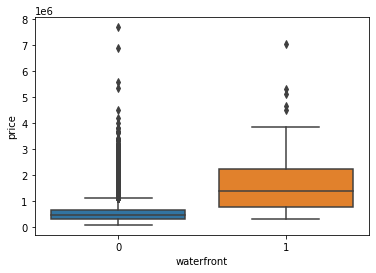

In [ ]:
width = 6
height = 4
plt.figure(figsize=(width, height))
sns.boxplot(x="waterfront", y="price", data = df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


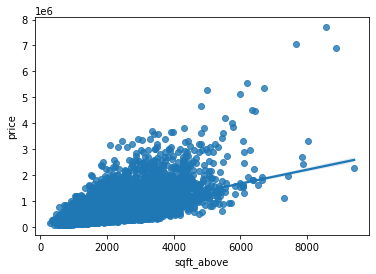

In [ ]:
sns.regplot('sqft_above', 'price', data = df)

In [ ]:
df[['sqft_above', 'price']].corr()

,sqft_above,price
sqft_above,1.000000,0.605567
price,0.605567,1.000000


In [ ]:
#Correlation between sqft_above and price is positive. Now lets find if it is signficantly true
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['sqft_above'], df['price'])

In [ ]:
pearson_coef, p_value

(0.605567298356078, 0.0)

In [ ]:
#Lets develop and fit our model for prediction

from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
X = df[['sqft_living']]
Y = df['price']

In [ ]:
#We will be creating a model to predict house price using sqft of the living room but lets check its correlation

In [ ]:
df[['sqft_living', 'price']].corr()

,sqft_living,price
sqft_living,1.000000,0.702035
price,0.702035,1.000000


In [ ]:
#Strong positive correlation. Lets check if it is significant.

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['sqft_living'], df['price'])
pearson_coef, p_value

(0.7020350546118002, 0.0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


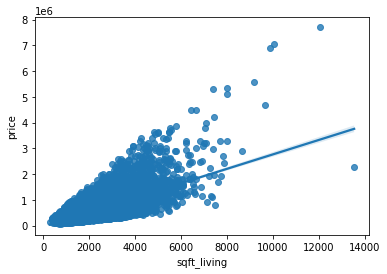

In [ ]:
sns.regplot('sqft_living', 'price', data = df)

In [ ]:
lm.fit(X,Y)

LinearRegression()

In [ ]:
lm.coef_

array([280.6235679])

In [ ]:
lm.intercept_

-43580.74309447396

In [ ]:
#Model Price = 280.62*Sqft_living - 43580.74
#Lets check its significance with the coefficient of determination (R2)

In [ ]:
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4928532179037931


In [ ]:
#Only 49.28% of the data can be explained by this model. Not good!

#Now lets predict price using a list of features
#"floors","waterfront","lat","bedrooms","sqft_basement","view","bathrooms","sqft_living15","sqft_above","grade","sqft_living".

In [ ]:
#But first lets check if these are good predictors by checking for a relationship.

In [ ]:
df[["price","floors","waterfront","lat","bedrooms","sqft_basement","view","bathrooms","sqft_living15","sqft_above","grade","sqft_living"]].corr()

,price,floors,waterfront,lat,bedrooms,sqft_basement,view,bathrooms,sqft_living15,sqft_above,grade,sqft_living
price,1.000000,0.256794,0.266369,0.307003,0.308350,0.323816,0.397293,0.525138,0.585379,0.605567,0.667434,0.702035
floors,0.256794,1.000000,0.023698,0.049614,0.175429,-0.245705,0.029444,0.500653,0.279885,0.523885,0.458183,0.353949
waterfront,0.266369,0.023698,1.000000,-0.014274,-0.006582,0.080588,0.401857,0.063744,0.086463,0.072075,0.082775,0.103818
lat,0.307003,0.049614,-0.014274,1.000000,-0.008931,0.110538,0.006157,0.024573,0.048858,-0.000816,0.114084,0.052529
bedrooms,0.308350,0.175429,-0.006582,-0.008931,1.000000,0.303093,0.079532,0.515884,0.391638,0.477600,0.356967,0.576671
sqft_basement,0.323816,-0.245705,0.080588,0.110538,0.303093,1.000000,0.276947,0.283770,0.200355,-0.051943,0.168392,0.435043
view,0.397293,0.029444,0.401857,0.006157,0.079532,0.276947,1.000000,0.187737,0.280439,0.167649,0.251321,0.284611
bathrooms,0.525138,0.500653,0.063744,0.024573,0.515884,0.283770,0.187737,1.000000,0.568634,0.685342,0.664983,0.754665
sqft_living15,0.585379,0.279885,0.086463,0.048858,0.391638,0.200355,0.280439,0.568634,1.000000,0.731870,0.713202,0.756420
sqft_above,0.605567,0.523885,0.072075,-0.000816,0.477600,-0.051943,0.167649,0.685342,0.731870,1.000000,0.755923,0.876597


In [ ]:
#They all have a positive linear relationship with price

In [ ]:
Z = df[["floors","waterfront","lat","bedrooms","sqft_basement","view","bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]

In [ ]:
lm.fit(Z,Y)

LinearRegression()

In [ ]:
lm.intercept_

-32384583.85823347

In [ ]:
lm.coef_

array([-3.33228219e+04,  6.09968552e+05,  6.72931702e+05, -2.56397132e+04,
       -2.44395054e+15,  6.70059898e+04, -3.55100775e+03,  4.42839762e+00,
       -2.44395054e+15,  8.21942799e+04,  2.44395054e+15])

In [ ]:
#Our model is
# Price = -32384583.85823347-3.33228219e+04(floors) + 6.09968552e+05(Waterfront)......... so on

In [ ]:
#Let check if the model is significant

In [ ]:
print('The R-square is: ', lm.score(Z, Y))

The R-square is:  0.6577146682819989


In [ ]:
#Model looks great but only 65% of price can be explained by the features. Still not okay enough 

#Lets check if it fits

In [ ]:
Y_hat = lm.predict(Z)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'House features')

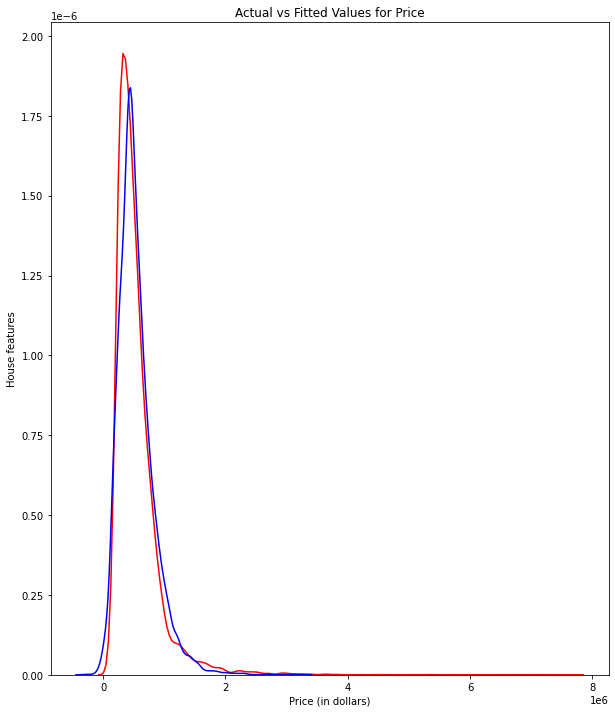

In [ ]:
height = 12
width = 10
plt.figure(figsize=(width, height))
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('House features')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


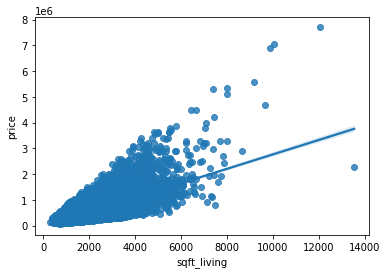

In [ ]:
sns.regplot(X,Y)